In [1]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#https://www.kaggle.com/chrisbow/2018-calorie-exercise-and-weight-changes

In [4]:
diet_data = pd.read_csv('diet_data.csv')

In [5]:
diet_data = diet_data.sample(frac=1).reset_index(drop=True)

In [6]:
diet_data.head(10)

,Date,Stone,Pounds,Ounces,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight,change
0,10/31/2018,11.0,13.0,0.0,2672.0,2350.0,0.88,1.0,1.0,1.0,0.0,0.0,0.0,-8.0
1,12/26/2018,NaN,NaN,NaN,0.0,NaN,#DIV/0!,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,12/6/2018,11.0,12.0,2.0,2658.0,2300.0,0.87,0.0,1.0,0.0,1.0,0.0,1.0,-18.0
3,10/25/2018,12.0,1.0,0.0,2704.0,2850.0,1.05,1.0,1.0,0.0,0.0,0.0,0.0,2.0
4,9/30/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11/26/2018,12.0,2.0,6.0,2726.0,2000.0,0.73,1.0,1.0,0.0,0.0,0.0,0.0,-20.0
6,8/19/2018,12.0,0.0,6.0,2694.0,4200.0,1.56,0.0,0.0,0.0,1.0,0.0,0.0,16.0
7,10/29/2018,12.0,4.0,0.0,2752.0,1400.0,0.51,0.0,1.0,0.0,0.0,0.0,0.0,-48.0
8,9/11/2018,11.0,13.0,4.0,2676.0,2100.0,0.78,0.0,1.0,0.0,0.0,1.0,1.0,-14.0
9,8/2/2018,12.0,1.0,0.0,2704.0,1850.0,0.68,1.0,1.0,0.0,1.0,0.0,0.0,-40.0


In [7]:
diet_data[diet_data.isnull().any(axis=1)].count()

Date           10
Stone           2
Pounds          2
Ounces          2
weight_oz       9
calories        0
cals_per_oz     7
five_donuts     0
walk            0
run             0
wine            0
prot            0
weight          0
change          7
dtype: int64

In [8]:
diet_data = diet_data.dropna()

In [9]:
diet_data[diet_data.isnull().any(axis=1)].count()

Date           0
Stone          0
Pounds         0
Ounces         0
weight_oz      0
calories       0
cals_per_oz    0
five_donuts    0
walk           0
run            0
wine           0
prot           0
weight         0
change         0
dtype: int64

In [10]:
diet_data.shape

(140, 14)

In [11]:
diet_data.describe()

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,11.542857,6.157143,3.585714,2687.700000,3180.714286,0.371429,0.678571,0.250000,0.307143,0.178571,0.442857,-1.485714
std,0.499949,5.664824,2.913589,28.663189,1478.753433,0.484922,0.468702,0.434568,0.462966,0.384368,0.498508,25.098793
min,11.000000,0.000000,0.000000,2628.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000
25%,11.000000,1.000000,0.000000,2670.000000,2187.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000
50%,12.000000,3.000000,4.000000,2689.000000,2575.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000
75%,12.000000,12.000000,6.000000,2704.000000,3850.000000,1.000000,1.000000,0.250000,1.000000,0.000000,1.000000,16.000000
max,12.000000,13.000000,8.000000,2768.000000,9150.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,102.000000


Text(0, 0.5, 'change in weight')

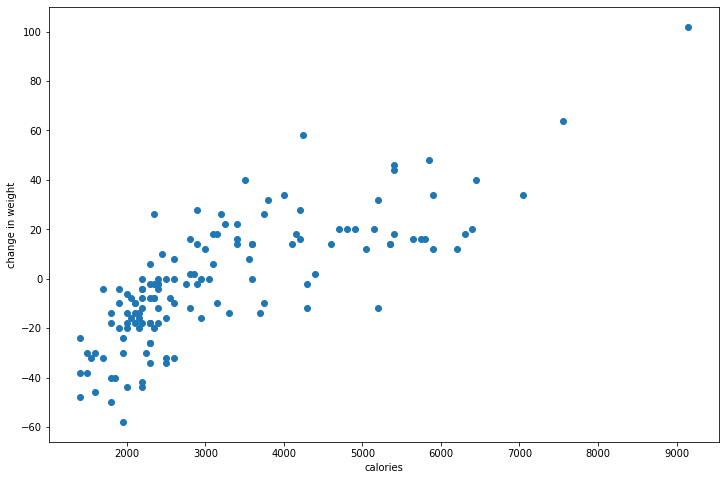

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diet_data['calories'], diet_data['change'])

plt.xlabel('calories')
plt.ylabel('change in weight')

Text(0, 0.5, 'change in weight')

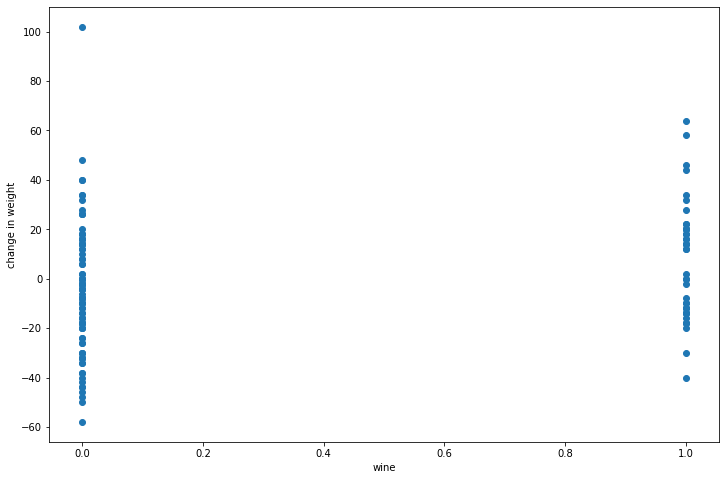

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.scatter(diet_data['wine'], diet_data['change'])

plt.xlabel('wine')
plt.ylabel('change in weight')

In [15]:
diet_data_corr = diet_data.corr()

diet_data_corr

,Stone,Pounds,Ounces,weight_oz,calories,five_donuts,walk,run,wine,prot,weight,change
Stone,1.000000,-0.980384,-0.190219,0.787595,0.002099,0.052567,-0.109649,-0.033113,-0.072821,-0.133707,0.009897,-0.286142
Pounds,-0.980384,1.000000,0.157404,-0.652264,-0.030854,-0.029257,0.122125,0.054065,0.030841,0.135703,0.010845,0.214880
Ounces,-0.190219,0.157404,1.000000,-0.143811,-0.012220,0.007856,0.049295,-0.031251,0.041677,0.040839,0.008350,0.123744
weight_oz,0.787595,-0.652264,-0.143811,1.000000,-0.090605,0.113664,-0.037218,0.038408,-0.182756,-0.089135,0.073811,-0.425912
calories,0.002099,-0.030854,-0.012220,-0.090605,1.000000,-0.239251,-0.434065,0.000840,0.270376,0.073819,0.123413,0.773989
five_donuts,0.052567,-0.029257,0.007856,0.113664,-0.239251,1.000000,0.275835,-0.136558,-0.159311,-0.281215,-0.149653,-0.214417
walk,-0.109649,0.122125,0.049295,-0.037218,-0.434065,0.275835,1.000000,-0.132453,-0.072229,0.201095,0.059382,-0.384581
run,-0.033113,0.054065,-0.031251,0.038408,0.000840,-0.136558,-0.132453,1.000000,-0.062577,-0.053838,0.249068,-0.150387
wine,-0.072821,0.030841,0.041677,-0.182756,0.270376,-0.159311,-0.072229,-0.062577,1.000000,-0.027434,-0.063680,0.215387
prot,-0.133707,0.135703,0.040839,-0.089135,0.073819,-0.281215,0.201095,-0.053838,-0.027434,1.000000,0.522965,0.035156


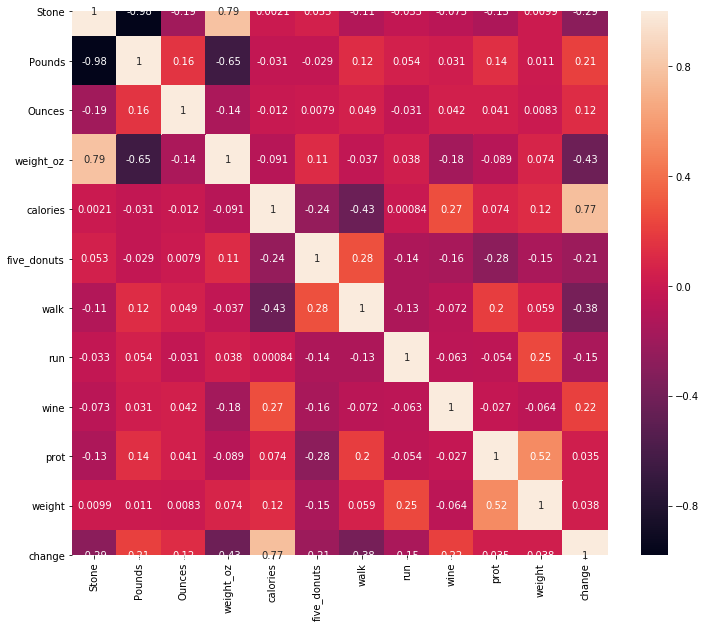

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(diet_data_corr, annot=True)

In [21]:
from sklearn.model_selection import train_test_split

X = diet_data.drop(['change', 'Date', 'Stone', 'Pounds', 'Ounces'],axis=1)
Y = diet_data['change']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [22]:
x_train.sample(5)

,weight_oz,calories,cals_per_oz,five_donuts,walk,run,wine,prot,weight
104,2672.0,3150.0,1.18,0.0,0.0,1.0,1.0,0.0,1.0
85,2706.0,2750.0,1.02,1.0,0.0,0.0,0.0,0.0,0.0
129,2662.0,2400.0,0.90,1.0,1.0,0.0,0.0,0.0,0.0
77,2656.0,9150.0,3.45,0.0,0.0,0.0,0.0,0.0,1.0
147,2672.0,2300.0,0.86,1.0,1.0,1.0,0.0,0.0,0.0


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [25]:
from sklearn.neural_network import MLPRegressor

In [27]:
mpl_reg = MLPRegressor(activation = 'relu',
                      hidden_layer_sizes = (1,),
                      solver = 'lbfgs',
                      verbose = True,
                      max_iter = 100)

In [28]:
mpl_reg.fit(x_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=100, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [29]:
y_pred = mpl_reg.predict(x_test)

In [30]:
from sklearn.metrics import r2_score 

In [31]:
mpl_reg.score(x_train, y_train)

0.7616504975720794

In [32]:
r2_score(y_test, y_pred)

0.7690847755641996

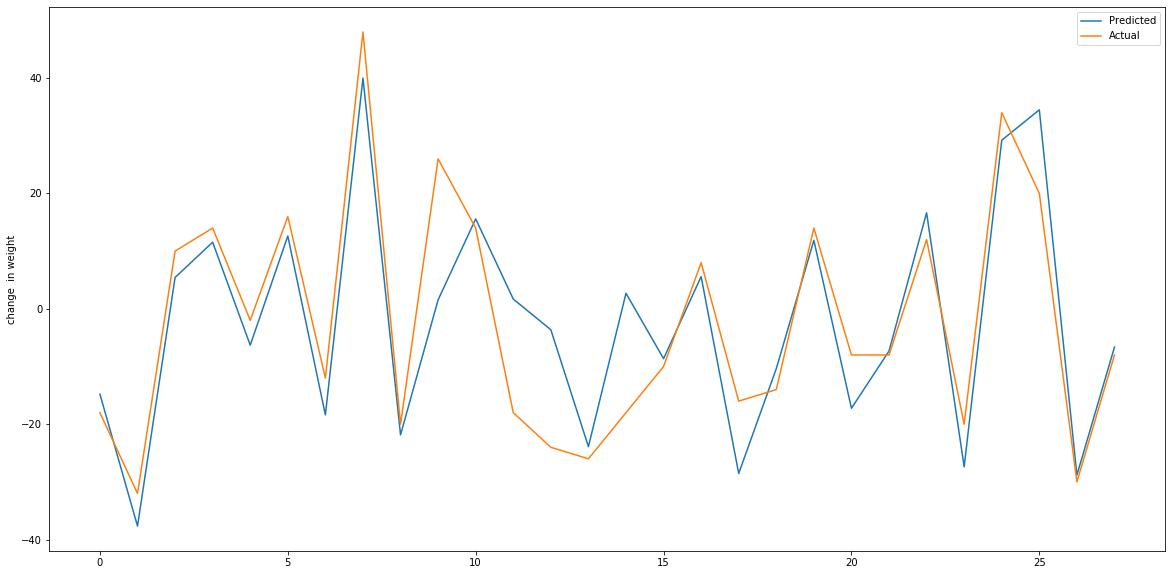

In [34]:
plt.figure(figsize=(20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('change  in weight')

plt.legend()
plt.show()